In [1]:
# Importing libraries to use 

# Data Manipulation
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

import os
import datetime as dt

In [2]:
# load the data in and display first row

file = r'''C:\Users\John Paul\Downloads\Datasets\DSI_kickstarterscrape_dataset.xlsx'''

data = pd.read_excel(file)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45957 entries, 0 to 45956
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   project id         45957 non-null  int64  
 1   name               45955 non-null  object 
 2   url                45957 non-null  object 
 3   category           45957 non-null  object 
 4   subcategory        45957 non-null  object 
 5   location           44635 non-null  object 
 6   status             45957 non-null  object 
 7   goal               45957 non-null  float64
 8   pledged            45945 non-null  float64
 9   funded percentage  45957 non-null  float64
 10  backers            45957 non-null  int64  
 11  funded date        45957 non-null  object 
 12  levels             45957 non-null  int64  
 13  reward levels      45898 non-null  object 
 14  updates            45957 non-null  int64  
 15  comments           45957 non-null  int64  
 16  duration           459

In [5]:
data.dtypes

project id             int64
name                  object
url                   object
category              object
subcategory           object
location              object
status                object
goal                 float64
pledged              float64
funded percentage    float64
backers                int64
funded date           object
levels                 int64
reward levels         object
updates                int64
comments               int64
duration             float64
dtype: object

In [6]:
data.isnull().sum()

project id              0
name                    2
url                     0
category                0
subcategory             0
location             1322
status                  0
goal                    0
pledged                12
funded percentage       0
backers                 0
funded date             0
levels                  0
reward levels          59
updates                 0
comments                0
duration                0
dtype: int64

In [7]:
# Pledged has 12 missing values in it. Lets take a look at them

data[data['pledged'].isnull()]

,project id,name,url,category,subcategory,location,status,goal,pledged,funded percentage,backers,funded date,levels,reward levels,updates,comments,duration
1187,55442017,Xenonauts,http://www.kickstarter.com/projects/69341191/x...,Games,Video Games,"London, United Kingdom",live,50000.0,NaN,2.219487,3276,"Sun, 10 Jun 2012 23:19:04 -0000",17,"$20,$30,$50,$50,$50,$60,$75,$85,$100,$100,$125...",8,562,33.00
4502,213683990,Twokinds Book Printing Drive,http://www.kickstarter.com/projects/twokinds/t...,Comics,Comics,"Cincinnati, OH",live,25000.0,NaN,6.303783,1855,"Sat, 09 Jun 2012 20:00:00 -0000",34,"$10,$12,$15,$20,$20,$20,$20,$25,$25,$35,$35,$4...",6,1133,31.24
13381,636029584,HICKIES - TURN YOUR KICKS INTO SLIP-ONS,http://www.kickstarter.com/projects/hickies/hi...,Design,Product Design,"Brooklyn, NY",live,25000.0,NaN,4.907843,2707,"Thu, 14 Jun 2012 15:44:14 -0000",9,"$16,$30,$45,$59,$75,$90,$115,$300,$500",6,119,45.00
13802,656206605,Genie - Motion control time lapse device,http://www.kickstarter.com/projects/syrp/genie...,Design,Product Design,"Queenstown, New Zealand",live,150000.0,NaN,2.999618,671,"Tue, 26 Jun 2012 06:29:41 -0000",13,"$1,$15,$30,$50,$100,$590,$690,$750,$790,$3,000...",10,89,60.00
25239,1184761342,B9Creator - A High Resolution 3D Printer,http://www.kickstarter.com/projects/b9creation...,Technology,Open Hardware,"Deadwood, SD",live,50000.0,NaN,4.761380,233,"Tue, 12 Jun 2012 07:00:00 -0000",11,"$5,$25,$59,$99,$132,$183,$216,$2,375,$2,675,$3...",12,100,33.07
29412,1382865280,Phil Tippett's &quot;MAD GOD&quot;,http://www.kickstarter.com/projects/madgod/phi...,Film &amp; Video,Animation,"Berkeley, CA",live,40000.0,NaN,2.532484,1950,"Sat, 16 Jun 2012 22:36:31 -0000",10,"$10,$25,$55,$75,$100,$115,$300,$1,800,$3,600,$...",3,59,30.00
31164,1467412732,gTar: The First Guitar That Anybody Can Play,http://www.kickstarter.com/projects/incident/g...,Technology,Technology,"Santa Clara, CA",live,100000.0,NaN,2.846420,753,"Mon, 25 Jun 2012 17:26:04 -0000",11,"$1,$25,$350,$399,$450,$499,$599,$699,$799,$999...",4,44,35.00
34274,1612550316,Space Command,http://www.kickstarter.com/projects/58936338/s...,Film &amp; Video,Film &amp; Video,"Studio City, CA",live,75000.0,NaN,1.796187,1610,"Sun, 15 Jul 2012 03:59:00 -0000",22,"$5,$8,$12,$17,$27,$37,$50,$67,$107,$257,$357,$...",24,279,60.00
35032,1648656751,BronyCon: The Documentary,http://www.kickstarter.com/projects/257527888/...,Film &amp; Video,Documentary,"Los Angeles, CA",live,60000.0,NaN,3.148185,1540,"Sun, 10 Jun 2012 18:59:00 -0000",15,"$10,$10,$30,$50,$75,$100,$150,$250,$500,$500,$...",5,525,26.97
40759,1911111579,Two Guys SpaceVenture - by the creators of Spa...,http://www.kickstarter.com/projects/spaceventu...,Games,Video Games,"Eugene, OR",live,500000.0,NaN,0.583738,5473,"Tue, 12 Jun 2012 17:27:38 -0000",33,"$15,$30,$31,$45,$50,$60,$75,$100,$100,$101,$11...",30,6895,35.00


In [8]:
data['pledged'] = data['goal'] * data['funded percentage']

In [9]:
data['pledged'].mean()

5030.204657653186

In [10]:
print(data.columns)
data.head(1)

Index(['project id', 'name', 'url', 'category', 'subcategory', 'location',
       'status', 'goal', 'pledged', 'funded percentage', 'backers',
       'funded date', 'levels', 'reward levels', 'updates', 'comments',
       'duration'],
      dtype='object')


,project id,name,url,category,subcategory,location,status,goal,pledged,funded percentage,backers,funded date,levels,reward levels,updates,comments,duration
0,39409,WHILE THE TREES SLEEP,http://www.kickstarter.com/projects/emiliesaba...,Film & Video,Short Film,"Columbia, MO",successful,10500.0,11545.000005,1.099524,66,"Fri, 19 Aug 2011 19:28:17 -0000",7,"$25,$50,$100,$250,$500,$1,000,$2,500",10,2,30.0


In [11]:
categorical_features = ['category', 'subcategory', 'location', 'status', 'levels', 'reward levels']
data['funded date'] = pd.DatetimeIndex(data['funded date'])
numerical_features = ['goal', 'pledged', 'funded percentage', 'backers', 'updates', 'comments', 'duration']

for col in categorical_features:
    data[col] = data[col].astype('category')
    
print(data.dtypes)

project id                         int64
name                              object
url                               object
category                        category
subcategory                     category
location                        category
status                          category
goal                             float64
pledged                          float64
funded percentage                float64
backers                            int64
funded date          datetime64[ns, UTC]
levels                          category
reward levels                   category
updates                            int64
comments                           int64
duration                         float64
dtype: object


In [12]:
data[numerical_features].describe()

,goal,pledged,funded percentage,backers,updates,comments,duration
count,4.595700e+04,4.595700e+04,45957.000000,45957.000000,45957.00000,45957.000000,45957.000000
mean,1.194271e+04,5.030205e+03,1.850129,69.973192,4.08508,8.379529,39.995547
std,1.887583e+05,5.683983e+04,88.492706,688.628479,6.43922,174.015737,17.414458
min,1.000000e-02,0.000000e+00,0.000000,0.000000,0.00000,0.000000,1.000000
25%,1.800000e+03,1.960000e+02,0.044000,5.000000,0.00000,0.000000,30.000000
50%,4.000000e+03,1.310000e+03,1.000000,23.000000,2.00000,0.000000,32.000000
75%,9.862000e+03,4.170000e+03,1.115640,59.000000,6.00000,3.000000,48.390000
max,2.147484e+07,1.026685e+07,15066.000000,87142.000000,149.00000,19311.000000,91.960000


In [13]:
# I can initially see that funded percentage has very large standard deviation compared to its mean with indicates
# a large varibility within the data. To confirm this lets look at its distribution.

In [18]:
# Create a function that we can re-use
def show_distribution(var_data):
    from matplotlib import pyplot as plt

    # Get statistics
    min_val = var_data.min()
    max_val = var_data.max()
    mean_val = var_data.mean()
    med_val = var_data.median()
    mod_val = var_data.mode()[0]

    print('Minimum:{:.2f}\nMean:{:.2f}\nMedian:{:.2f}\nMode:{:.2f}\nMaximum:{:.2f}\n'.format(min_val,
                                                                                            mean_val,
                                                                                            med_val,
                                                                                            mod_val,
                                                                                            max_val))

    # Create a figure for 2 subplots (2 rows, 1 column)
    fig, ax = plt.subplots(2, 1, figsize = (10,4))

    # Plot the histogram   
    ax[0].hist(var_data, log=True)
    ax[0].set_ylabel('Frequency')

    # Add lines for the mean, median, and mode
    ax[0].axvline(x=min_val, color = 'gray', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mean_val, color = 'green', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=med_val, color = 'red', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mod_val, color = 'yellow', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=max_val, color = 'gray', linestyle='dashed', linewidth = 2)

    # Plot the boxplot   
    ax[1].boxplot(var_data, vert=False)
    ax[1].set_xlabel('Value')

    # Add a title to the Figure
    fig.suptitle('Log of Data Distribution for ' + var_data.name)

    # Show the figure
    plt.show()


Minimum:0.01
Mean:11942.71
Median:4000.00
Mode:5000.00
Maximum:21474836.47



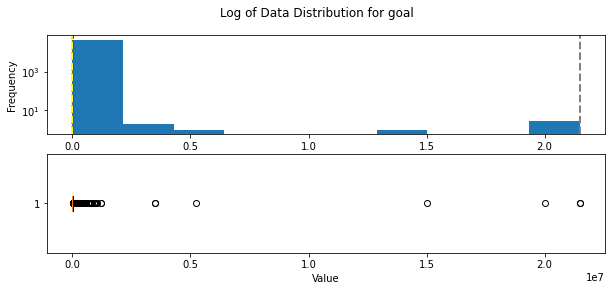

Minimum:0.00
Mean:5030.20
Median:1310.00
Mode:0.00
Maximum:10266845.74



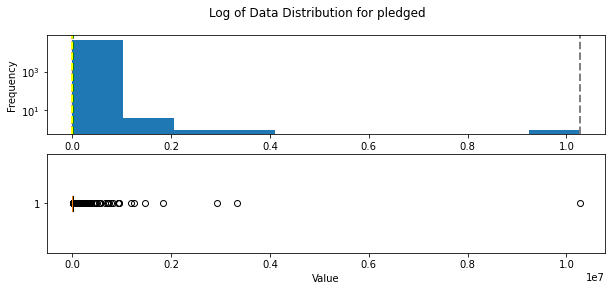

Minimum:0.00
Mean:1.85
Median:1.00
Mode:0.00
Maximum:15066.00



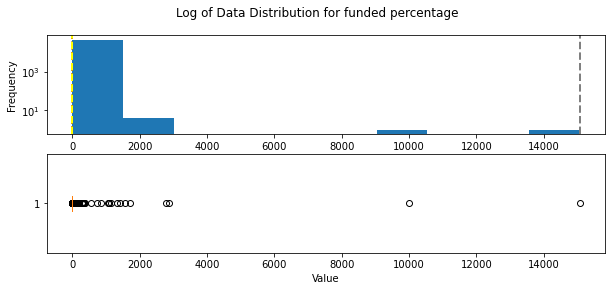

Minimum:0.00
Mean:69.97
Median:23.00
Mode:0.00
Maximum:87142.00



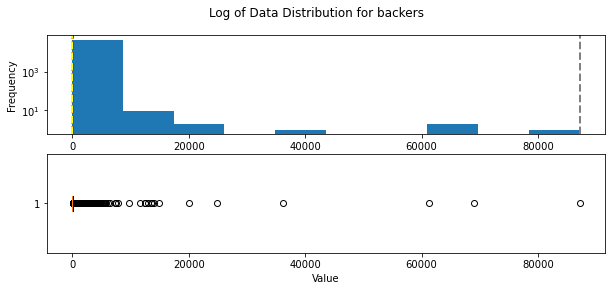

Minimum:0.00
Mean:4.09
Median:2.00
Mode:0.00
Maximum:149.00



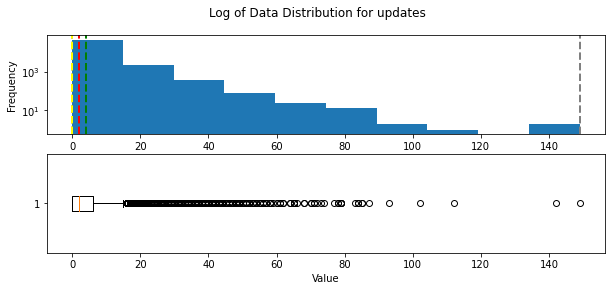

Minimum:0.00
Mean:8.38
Median:0.00
Mode:0.00
Maximum:19311.00



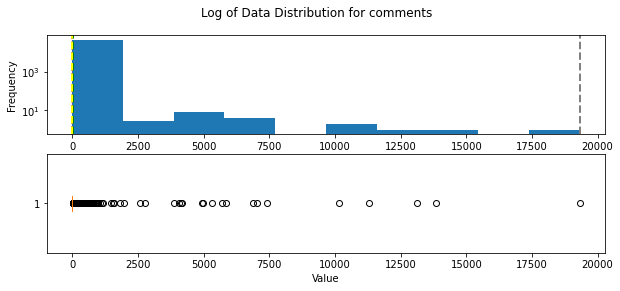

Minimum:1.00
Mean:40.00
Median:32.00
Mode:30.00
Maximum:91.96



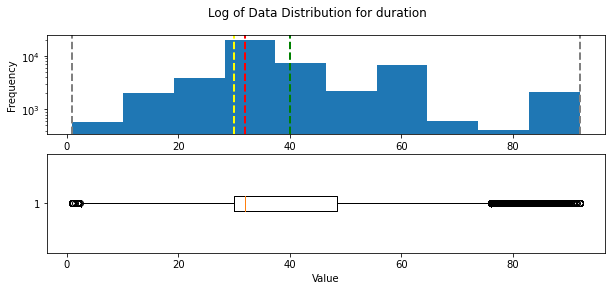

In [19]:
for col in numerical_features:
    show_distribution(data[col])

Minimum:0.00
Mean:3399.00
Median:1275.00
Mode:0.00
Maximum:48081.00



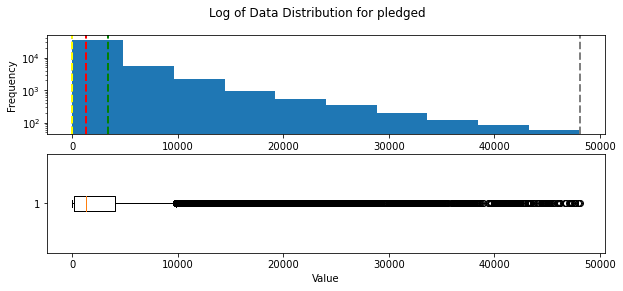

In [19]:
q95 = data.pledged.quantile(0.99)
# Get the variable to examine
col = data[data.pledged<q95]['pledged']
col1 = data.backers
# Call the function
show_distribution(col)

<AxesSubplot:title={'center':'duration'}, xlabel='status'>

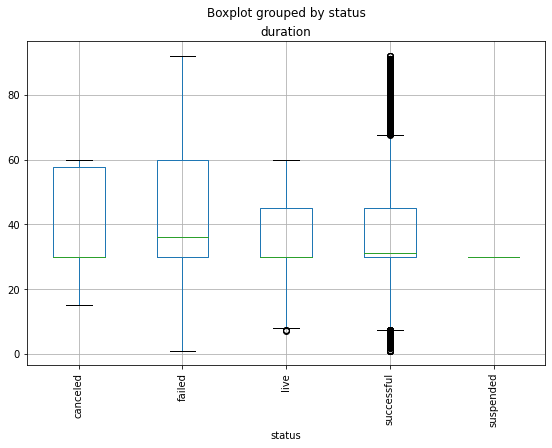

In [20]:
data.boxplot(column='duration', by='status', rot=90, figsize=(9,6))

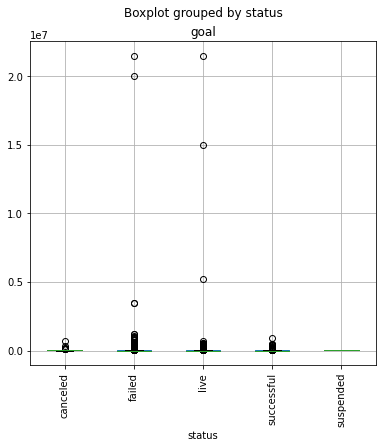

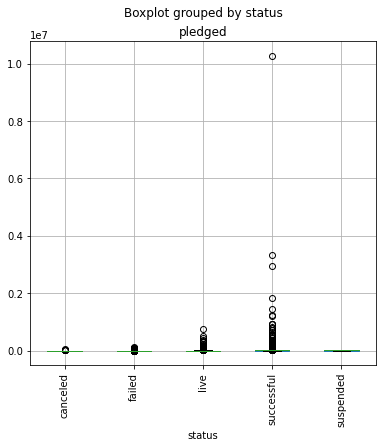

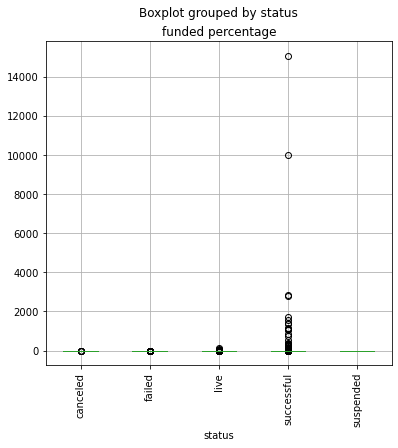

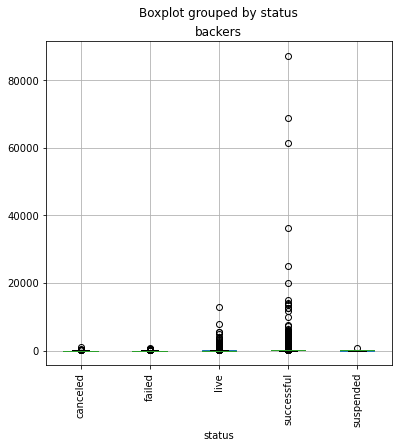

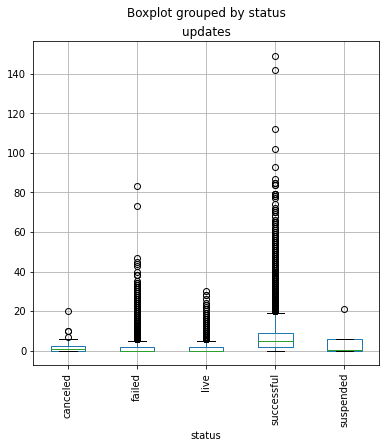

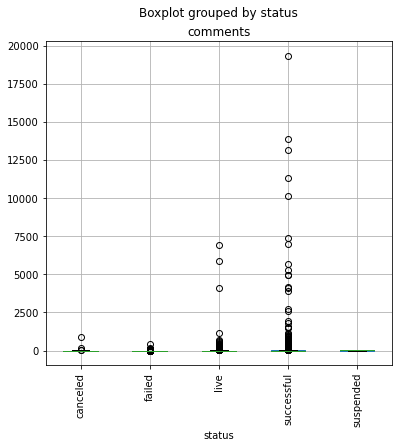

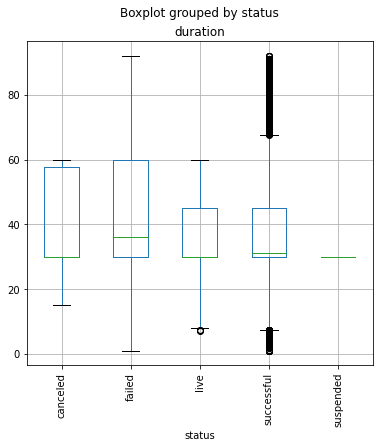

In [21]:
for col in numerical_features:
    data.boxplot(column=col, by='status', rot=90,figsize=(6,6))
    plt.title(col)
plt.show()

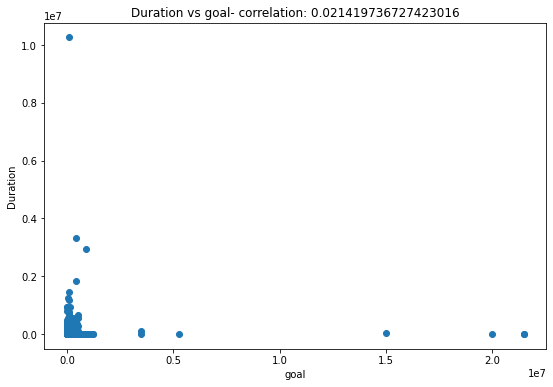

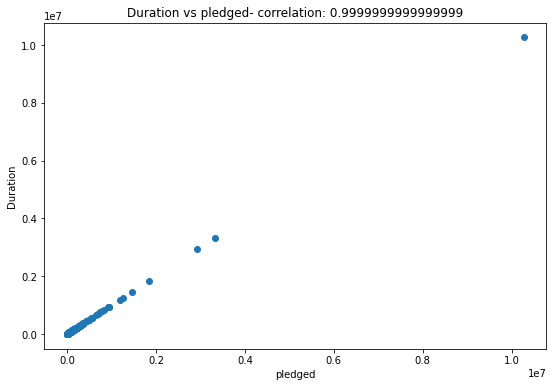

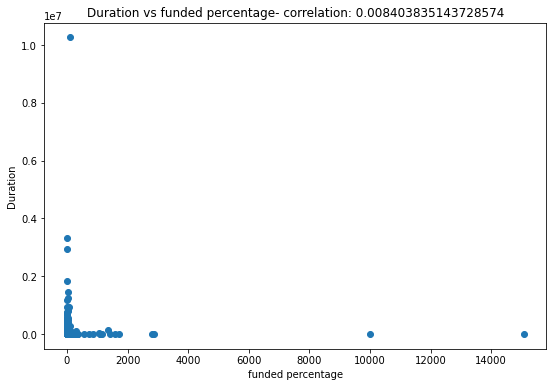

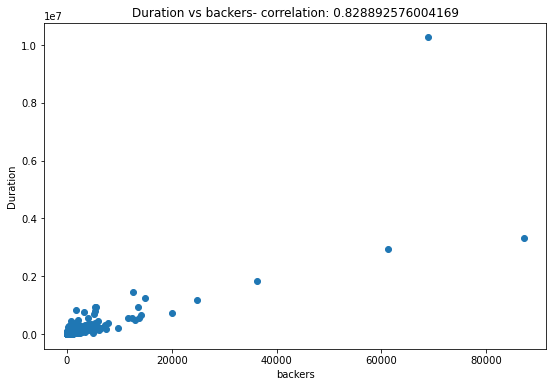

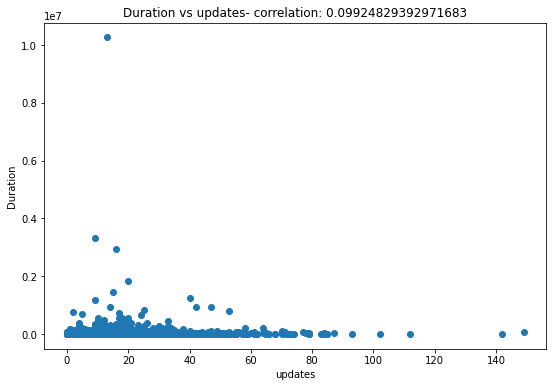

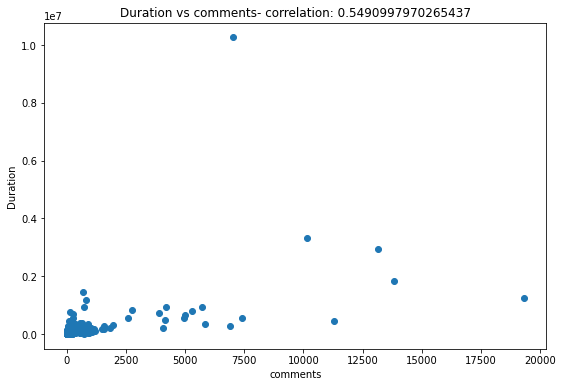

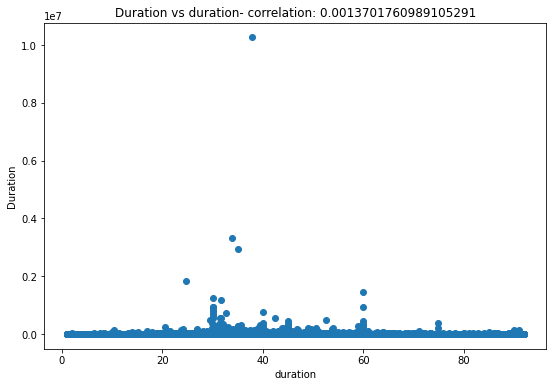

In [22]:
for col in numerical_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = data[col]
    label = data['pledged']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Duration')
    ax.set_title('Duration vs ' + col + '- correlation: ' + str(correlation)) 
plt.show()

In [28]:
data['category'].mode()

0    Film &amp; Video
Name: category, dtype: category
Categories (14, object): ['Art', 'Comics', 'Dance', 'Design', ..., 'Photography', 'Publishing', 'Technology', 'Theater']

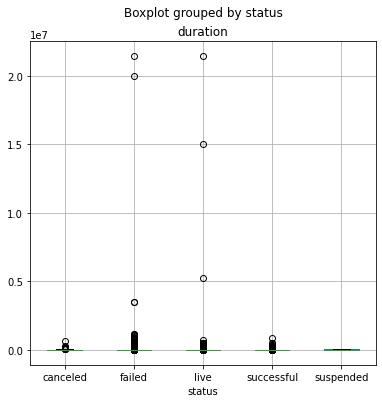

In [23]:
data.boxplot(column='goal', by='status', figsize=(6,6))
plt.title(col)
plt.show()

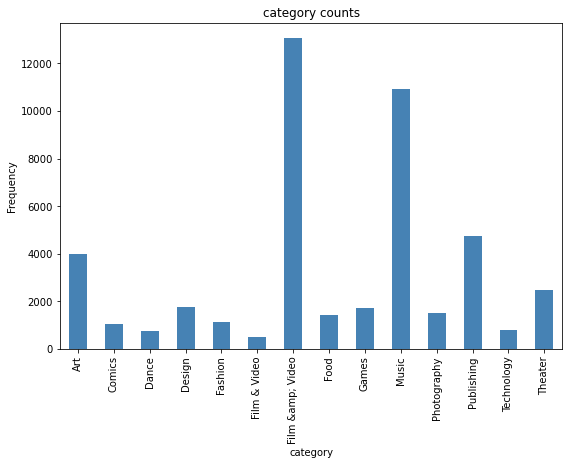

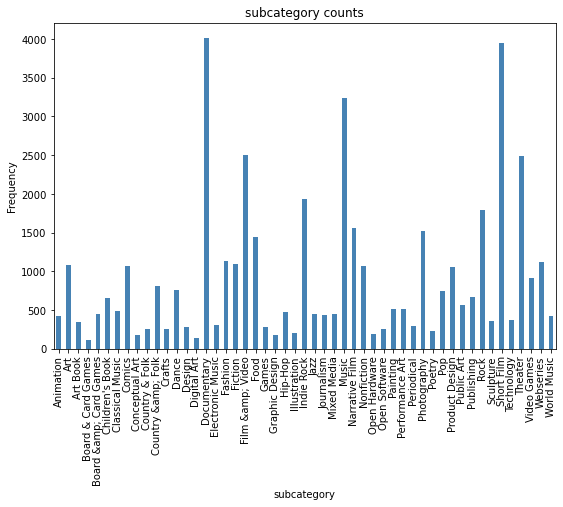

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 141 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 129 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 141 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 129 missing from current font.
  font.set_text(s, 0, flags=flags)


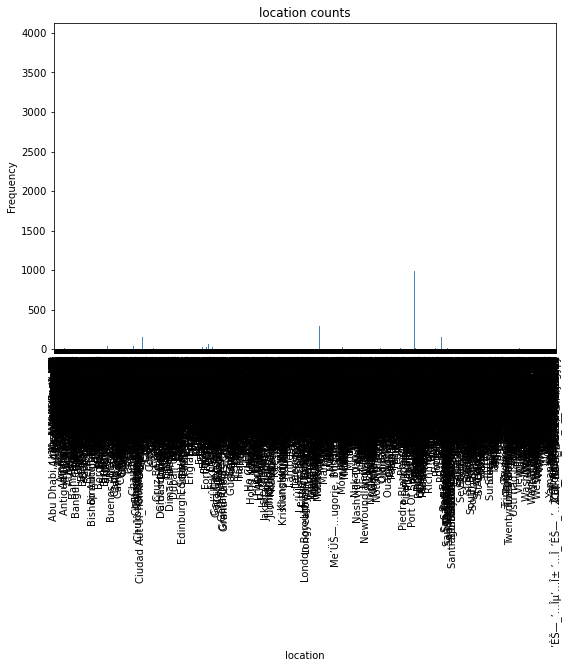

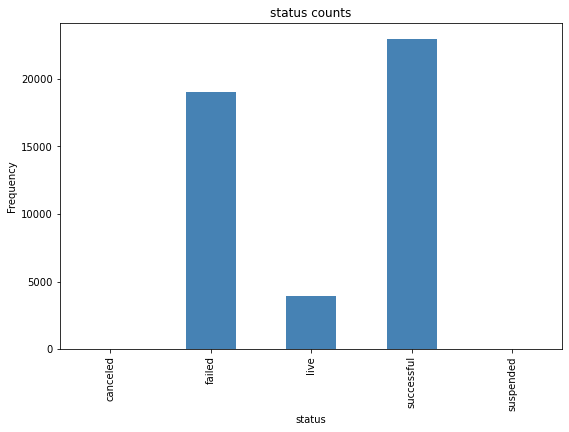

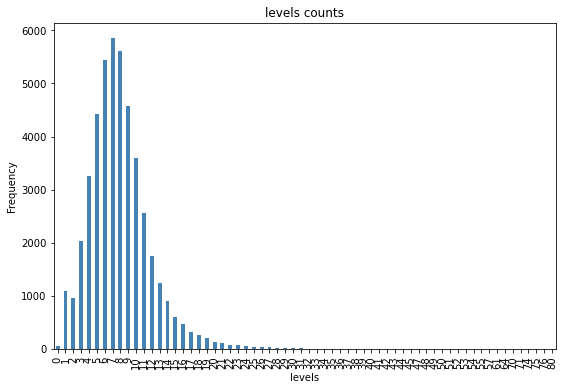

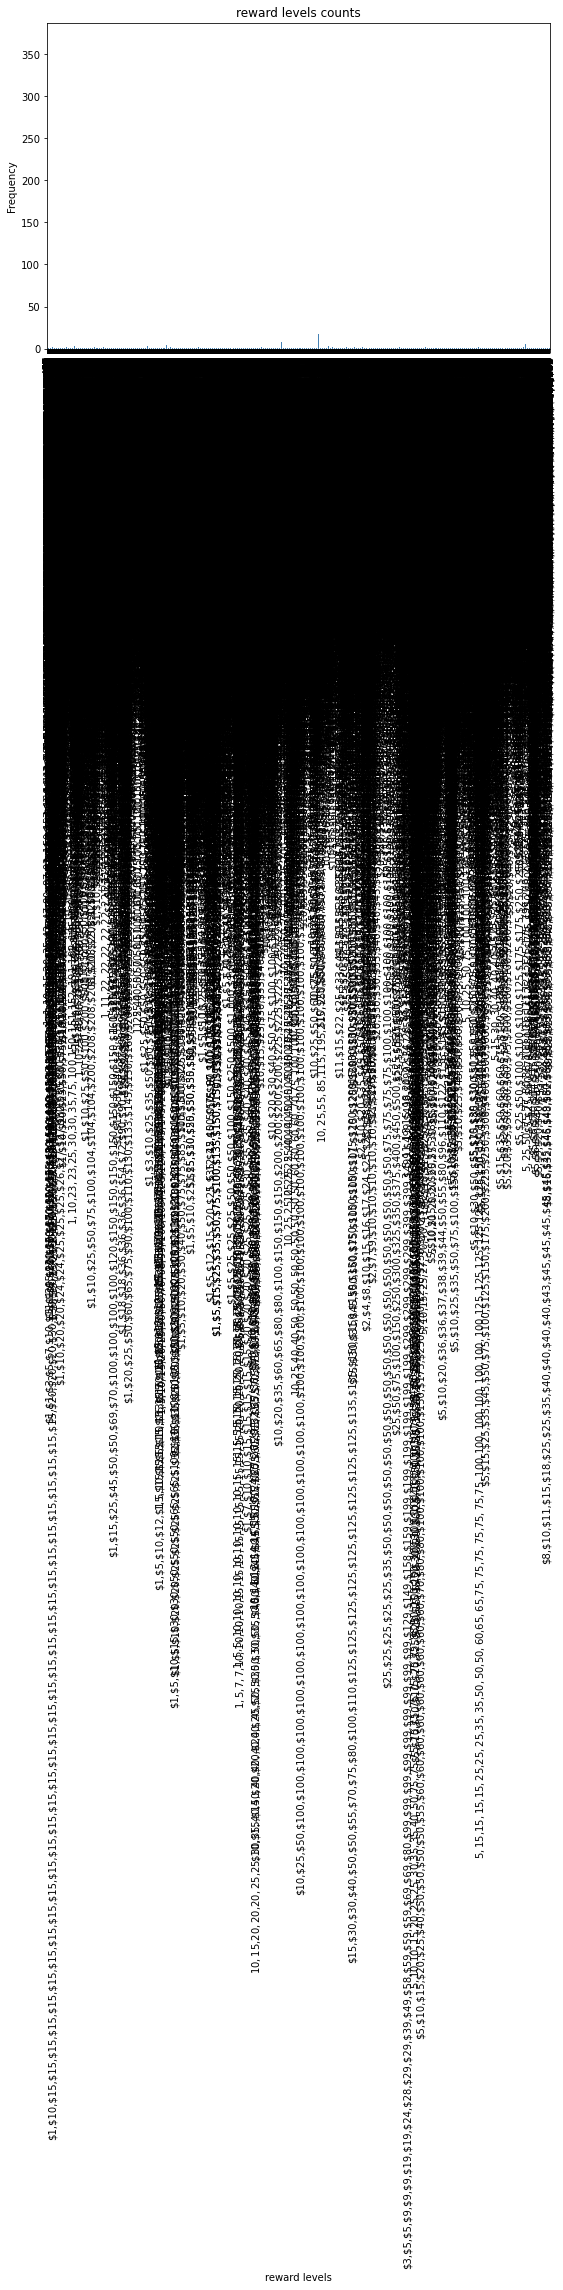

In [24]:
# plot a bar plot for each categorical feature count


for col in categorical_features:
    counts = data[col].value_counts().sort_index()
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    counts.plot.bar(ax = ax, color='steelblue')
    ax.set_title(col + ' counts')
    ax.set_xlabel(col) 
    ax.set_ylabel("Frequency")
plt.show()


In [25]:
data_success =  data[data['status'] == 'successful']

In [26]:
data_success.describe()

,project id,goal,pledged,funded percentage,backers,updates,comments,duration
count,2.296900e+04,22969.000000,2.296900e+04,22969.000000,22969.000000,22969.000000,22969.000000,22969.000000
mean,1.081375e+09,5483.827983,8.618655e+03,3.536888,119.377814,6.687144,14.386564,37.960475
std,6.206353e+08,12364.050311,7.964001e+04,125.146991,960.684332,7.709163,236.591264,16.651234
min,3.940900e+04,0.010000,1.000000e+00,0.999830,1.000000,0.000000,0.000000,1.000000
25%,5.459046e+08,1300.000000,1.655000e+03,1.033750,29.000000,2.000000,0.000000,30.000000
50%,1.087977e+09,3000.000000,3.500000e+03,1.110000,52.000000,5.000000,2.000000,31.000000
75%,1.619003e+09,6000.000000,7.255000e+03,1.320000,96.000000,9.000000,6.000000,45.000000
max,2.147460e+09,900000.000000,1.026685e+07,15066.000000,87142.000000,149.000000,19311.000000,91.960000


Minimum:1.00
Mean:37.96
Median:31.00
Mode:30.00
Maximum:91.96



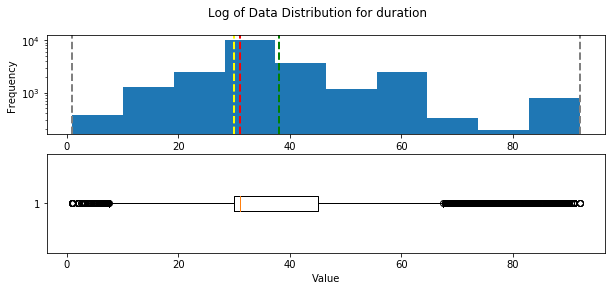

In [95]:
show_distribution(data_success['duration'])

Minimum:0.01
Mean:3332.96
Median:2500.00
Mode:5000.00
Maximum:10870.00



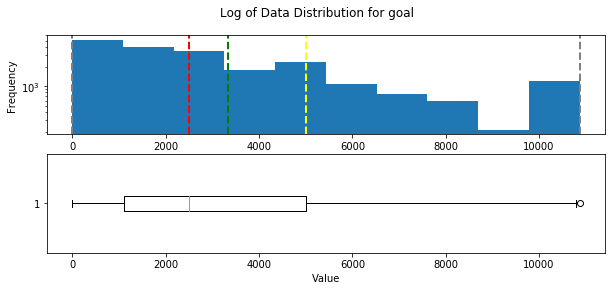

In [96]:
goalqr = data_success.goal.quantile(0.9)
goalcol = data_success[data_success.goal<goalqr]['goal']
show_distribution(goalcol)

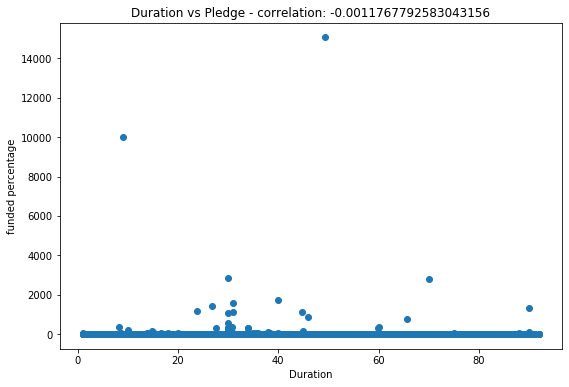

In [98]:

fig = plt.figure(figsize=(9, 6))
ax = fig.gca()
feature = data_success['duration']
label = data_success['funded percentage']
correlation = feature.corr(label)
plt.scatter(x=feature, y=label)
plt.xlabel('Duration')
plt.ylabel('funded percentage')
ax.set_title('Duration vs Pledge - correlation: ' + str(correlation)) 
plt.show()

In [104]:
data_success['year'] = data_success['funded date'].year

AttributeError: 'Series' object has no attribute 'year'

In [103]:
data_success.dtypes

project id                         int64
name                              object
url                               object
category                        category
subcategory                     category
location                        category
status                          category
goal                             float64
pledged                          float64
funded percentage                float64
backers                            int64
funded date          datetime64[ns, UTC]
levels                          category
reward levels                   category
updates                            int64
comments                           int64
duration                         float64
year                               int64
dtype: object

In [106]:
data_success['funded date']

0       2011-08-19 19:28:17+00:00
3       2012-04-08 02:14:00+00:00
5       2011-06-22 13:33:00+00:00
7       2011-12-30 04:36:53+00:00
8       2010-04-18 04:59:00+00:00
                   ...           
45948   2011-06-30 18:37:03+00:00
45951   2009-07-01 05:00:00+00:00
45952   2012-03-30 13:57:00+00:00
45954   2012-01-16 05:00:00+00:00
45956   2011-08-04 04:30:00+00:00
Name: funded date, Length: 22969, dtype: datetime64[ns, UTC]

In [109]:
datetimes = pd.to_datetime(data_success['funded date'])

# assign your new columns
data_success['day'] = datetimes.dt.day
data_success['month'] = datetimes.dt.month
data_success['year'] = datetimes.dt.year

data_success

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the do

,project id,name,url,category,subcategory,location,status,goal,pledged,funded percentage,backers,funded date,levels,reward levels,updates,comments,duration,year,day,month
0,39409,WHILE THE TREES SLEEP,http://www.kickstarter.com/projects/emiliesaba...,Film & Video,Short Film,"Columbia, MO",successful,10500.0,11545.000005,1.099524,66,2011-08-19 19:28:17+00:00,7,"$25,$50,$100,$250,$500,$1,000,$2,500",10,2,30.00,2011,19,8
3,237090,GETTING OVER - One son's search to finally kno...,http://www.kickstarter.com/projects/charnick/g...,Film & Video,Documentary,"Los Angeles, CA",successful,6000.0,6535.000002,1.089167,100,2012-04-08 02:14:00+00:00,13,"$1,$10,$25,$30,$50,$75,$85,$100,$110,$250,$500...",4,0,32.22,2012,8,4
5,316217,Dinner Party - a short film about friendship.....,http://www.kickstarter.com/projects/249354515/...,Film & Video,Short Film,"Portland, OR",successful,3500.0,3581.660001,1.023331,39,2011-06-22 13:33:00+00:00,7,"$5,$25,$50,$100,$250,$500,$1,000",8,0,21.43,2011,22,6
7,407836,Help APORTA continue to make handwoven/knit ac...,http://www.kickstarter.com/projects/1078097864...,Fashion,Fashion,"Chicago, IL",successful,2000.0,2180.000000,1.090000,46,2011-12-30 04:36:53+00:00,7,"$10,$20,$50,$100,$250,$500,$1,000",13,5,30.00,2011,30,12
8,436325,Music - Comedy - Album!,http://www.kickstarter.com/projects/mattgriffo...,Music,Music,"Chicago, IL",successful,1000.0,1125.000000,1.125000,30,2010-04-18 04:59:00+00:00,12,"$5,$8,$10,$15,$20,$30,$50,$100,$120,$250,$500,...",10,1,67.53,2010,18,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45948,2147063427,Pumpkin Morgue Series 2,http://www.kickstarter.com/projects/353619240/...,Film &amp; Video,Webseries,"Los Angeles, CA",successful,200.0,884.000000,4.420000,16,2011-06-30 18:37:03+00:00,17,"$2,$5,$6,$8,$9,$10,$15,$20,$25,$30,$40,$50,$75...",5,0,90.00,2011,30,6
45951,2147219671,You Are Among Friends: a book for the little s...,http://www.kickstarter.com/projects/1877936423...,Publishing,Publishing,NaN,successful,350.0,750.000000,2.142857,41,2009-07-01 05:00:00+00:00,0,NaN,3,10,61.99,2009,1,7
45952,2147336747,The Dance Project,http://www.kickstarter.com/projects/685772205/...,Dance,Dance,"Austin, TX",successful,500.0,601.000000,1.202000,13,2012-03-30 13:57:00+00:00,3,"$20,$50,$100",2,0,37.83,2012,30,3
45954,2147367534,ELIZABETH REX,http://www.kickstarter.com/projects/elizabethr...,Music,Rock,"Los Angeles, CA",successful,10000.0,10000.000000,1.000000,58,2012-01-16 05:00:00+00:00,4,"$10,$25,$100,$500",2,0,27.32,2012,16,1


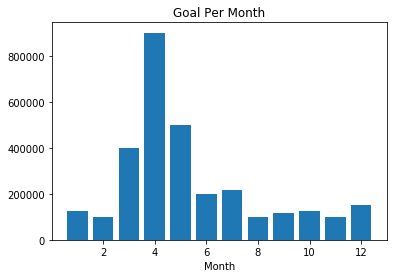

In [133]:

plt.bar(x=data_success.month, height=data_success['goal'])
plt.title('Goal Per Month')
plt.xlabel('Month')
plt.show()

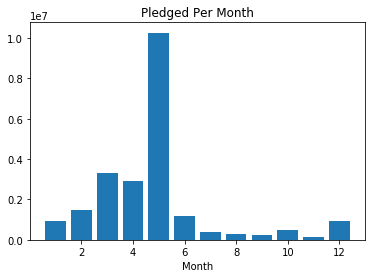

In [130]:
plt.bar(x=data_success.month, height=data_success['pledged'])
plt.title('Pledged Per Month')
plt.xlabel('Month')
plt.show()

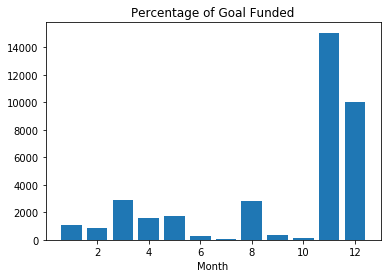

In [131]:
plt.bar(x=data_success.month, height=data_success['funded percentage'])
plt.title('Percentage of Goal Funded')
plt.xlabel('Month')
plt.show()

Minimum:0.01
Mean:5483.83
Median:3000.00
Mode:5000.00
Maximum:900000.00



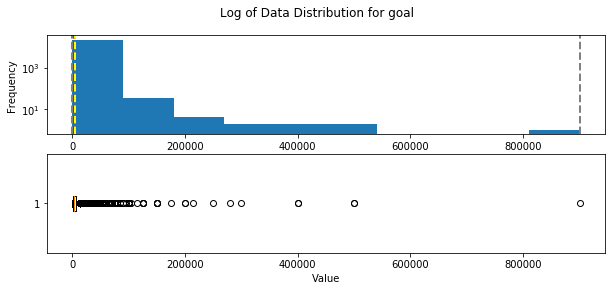

Minimum:1.00
Mean:8618.65
Median:3500.00
Mode:1000.00
Maximum:10266845.74



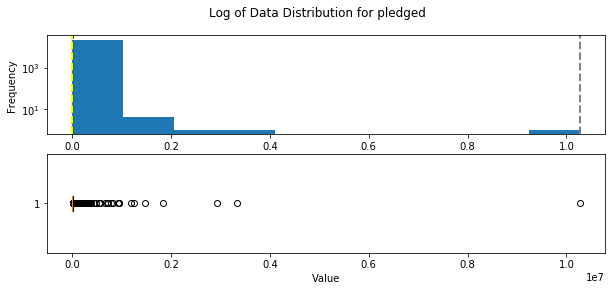

Minimum:1.00
Mean:3.54
Median:1.11
Mode:1.00
Maximum:15066.00



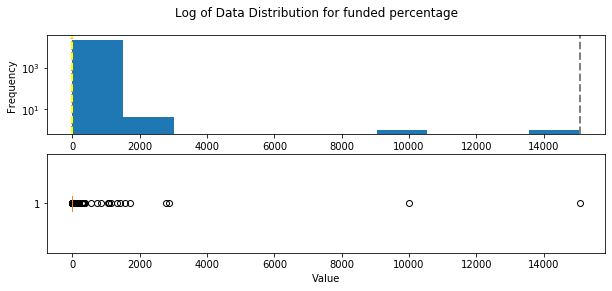

Minimum:1.00
Mean:119.38
Median:52.00
Mode:25.00
Maximum:87142.00



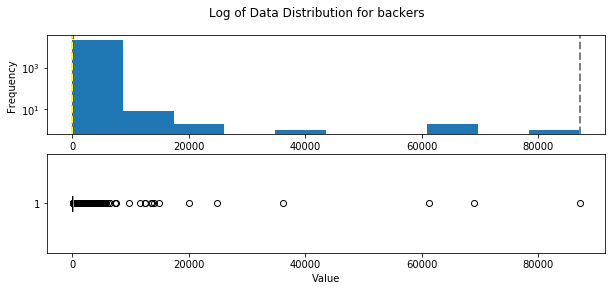

Minimum:0.00
Mean:6.69
Median:5.00
Mode:0.00
Maximum:149.00



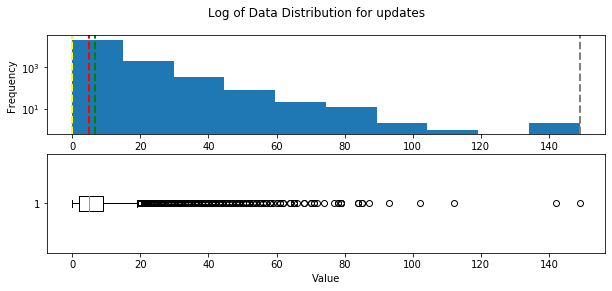

Minimum:0.00
Mean:14.39
Median:2.00
Mode:0.00
Maximum:19311.00



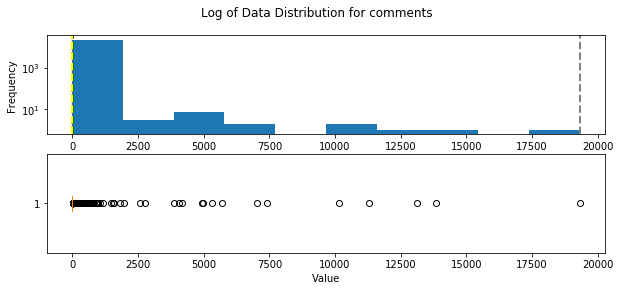

Minimum:1.00
Mean:37.96
Median:31.00
Mode:30.00
Maximum:91.96



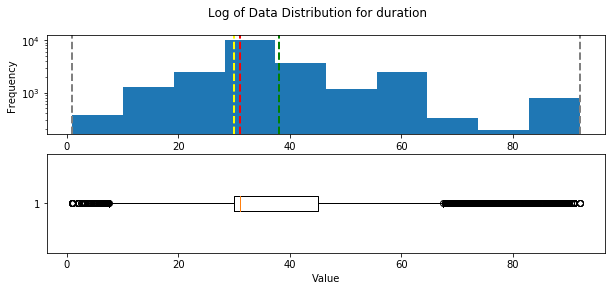

In [121]:
for col in numerical_features:
    show_distribution(data_success[col])

In [ ]:
show_distribution()